
# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

#### Biblioteca de importação

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



#### Carregando a base de dados

In [136]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

#### Preparação dos dados

In [149]:
X = boston.drop(columns=['medv']).copy()
X = pd.get_dummies(X, drop_first = True)
y = boston[['medv']]

In [150]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [151]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [152]:
# quantidade de linhas e colunas do dataframe 
boston.shape

(506, 14)

In [153]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [154]:
# verificação de dados duplicados 
boston.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [155]:
# dados adequados para utilização na biblioteca scikit learn, sem dados ausentes ou duplicados.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

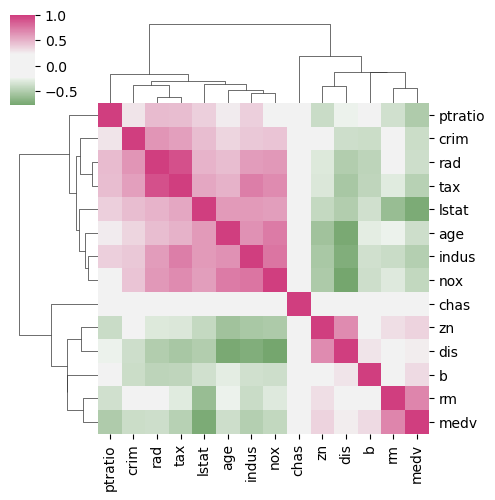

In [156]:
# configurando paleta de cores divergentes para o gráfico da matriz de correlação
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

# plotagem do gráfico de matriz de correlação 
sns.clustermap(boston.corr(), figsize=(5, 5), center = 0, cmap=cmap)

### 3. Separe os dados em validação e teste

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [158]:
# treino da primeira árvore de profundidade 8
regr_1 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [159]:
# treino da segunda árvore de profundidade 2
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [160]:
# calculando o erro quadratico com o método score para a base de treino
mse_train_1 = regr_1.score(X_train, y_train)
mse_train_2 = regr_2.score(X_train, y_train)

# cálculo do erro quadrático com o método score para a base de teste 
mse_test_1 = regr_1.score(X_test, y_test)
mse_test_2 = regr_2.score(X_test, y_test)

# Visualização dos resultados dos cálculos para a base de treino
template = "O MSE da árvore de treino de profundidade={0} é: {1:.2f}"
print(template.format(regr_1.get_depth(),mse_train_1).replace(".",","))
print(template.format(regr_2.get_depth(),mse_train_2).replace(".",","))
print('\n')
#Visualização dos resultados dos cálculos para a base de teste
template = "O MSE da árvore de teste de profundidade={0} é: {1:.2f}"
print(template.format(regr_1.get_depth(),mse_test_1).replace(".",","))
print(template.format(regr_2.get_depth(),mse_test_2).replace(".",","))

O MSE da árvore de treino de profundidade=8 é: 0,98
O MSE da árvore de treino de profundidade=2 é: 0,71


O MSE da árvore de teste de profundidade=8 é: 0,66
O MSE da árvore de teste de profundidade=2 é: 0,61


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Com base no MSE a árvore de profundidade 2 parece a mais adequada ante a possibilidade de overfitting da árvore de profundidade 8.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

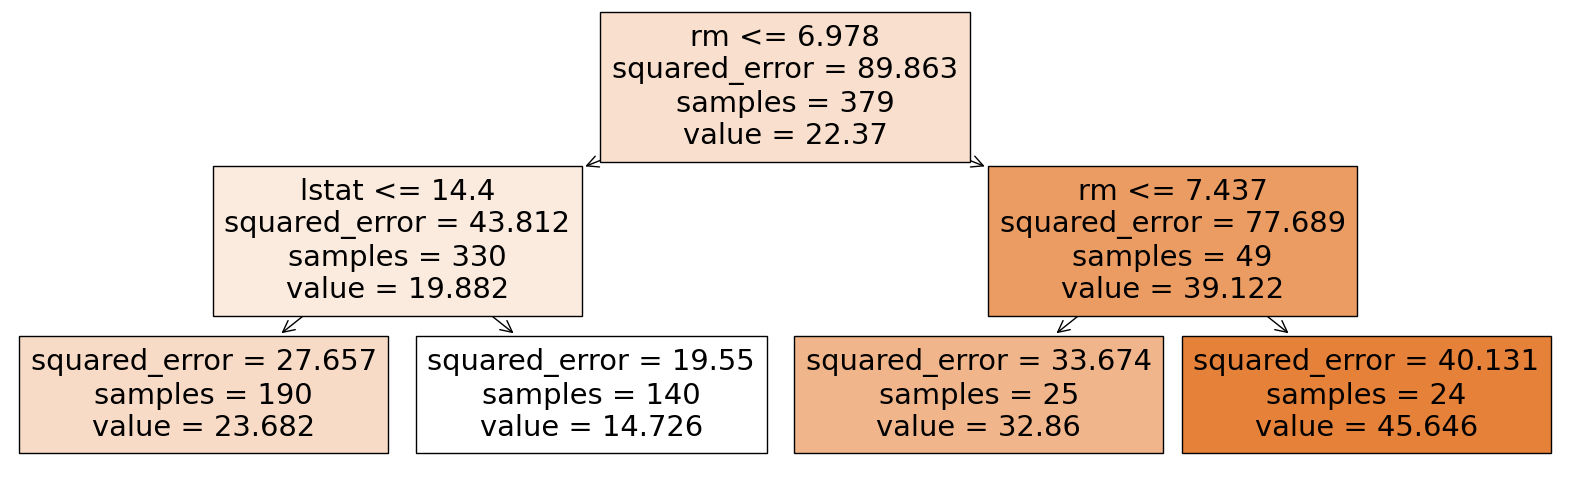

In [165]:
plt.figure(figsize=(20, 6))
tp = tree.plot_tree(regr_2, feature_names=list(X.columns.values), filled=True) 

A variável Istat apresenta relevância visto a quantidade de amostras em seu exemplo e o valor do mse.